# Fandango movie rating
In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator).


Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible.


In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

rating_before_raw=pd.read_csv(r'C:\Users\Administrator\Desktop\dataquest project\Fandango movie rating\fandango_score_comparison.csv')
before=rating_before_raw[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()

In [83]:
rating_after_raw=pd.read_csv(r'C:\Users\Administrator\Desktop\dataquest project\Fandango movie rating\movie_ratings_16_17.csv')
after=rating_after_raw[['movie', 'year', 'fandango']].copy()

# Origin sampling was not random
The samples we get right now are not sufficient for exploring the question we raised before. We change our goal to finding out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. 

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

For 'before' dataset, check 'Fandango_votes';

For 'after' dataset, because no information is provided, One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [84]:
# before dataset
len(before[before['Fandango_votes']<30])

0

In [85]:
# after dataset
after.sample(10,random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


# Check the Year

In [86]:
def get_year(s):
    return int(s[-5:-1])

before['Year']=before['FILM'].apply(get_year)
before=before[before['Year']==2015].copy()

In [87]:
after=after[after['year']==2016].copy()

# Analyze the rating distribution

([<matplotlib.axis.XTick at 0xd562208>,
 <a list of 11 Text xticklabel objects>)

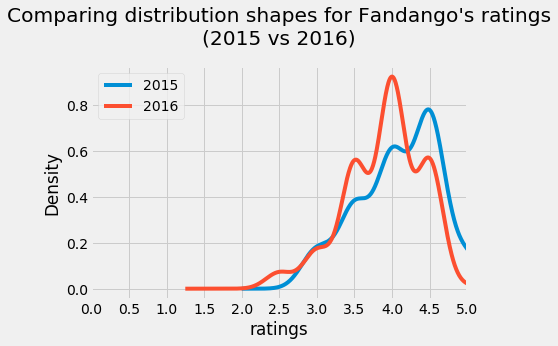

In [88]:
plt.style.use('fivethirtyeight')

before['Fandango_Stars'].plot.kde(label='2015',legend=True)
after['fandango'].plot.kde(label='2016',legend=True)
plt.xlabel('ratings')
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",y = 1.07)
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

Text(0.5, 1.07, "Comparing frequency for Fandango's ratings\n(2015 vs 2016)")

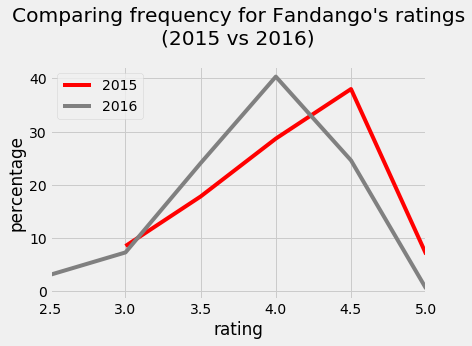

In [93]:
before_fre=before['Fandango_Stars'].value_counts(normalize=True).sort_index()*100
after_fre=after['fandango'].value_counts(normalize=True).sort_index()*100
before_fre.plot.line(label='2015',legend=True,color='red')
after_fre.plot.line(label='2016',legend=True,color='grey')
plt.xlabel('rating')
plt.ylabel('percentage')
plt.title("Comparing frequency for Fandango's ratings\n(2015 vs 2016)",y = 1.07)